#### Problem Statement: Analyze which variables impact employee attrition and build a prediction model.

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing csv file
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Looking at the size of the data
df.shape

(14999, 10)

In [6]:
# df does not have any missing values based on non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Looking at statistical summary
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [9]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

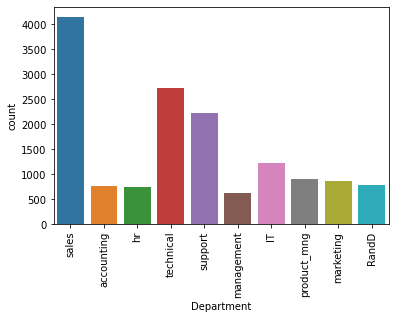

In [156]:
# Univariate analysis to deep dive into variables and understand more about the data.
sns.countplot(data = df, x = 'Department');
plt.xticks(rotation =  90);
plt.show()

Top 3 departments are Sales, Technical and Support in our dataset.

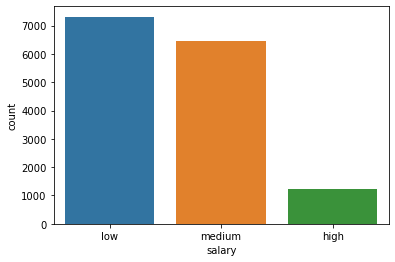

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [158]:
sns.countplot(data = df, x = 'salary');
plt.show()
df['salary'].value_counts(normalize = True)

Around 50% of the employees belong to low salary group.

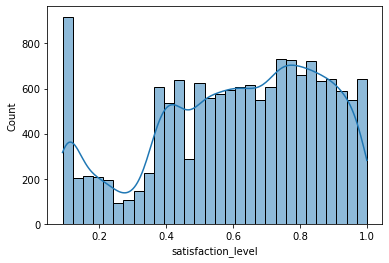

In [124]:
sns.histplot(data = df, x = 'satisfaction_level', kde= True);

Satisfaction level is right skewed indicating most of the people are highly satisfied.

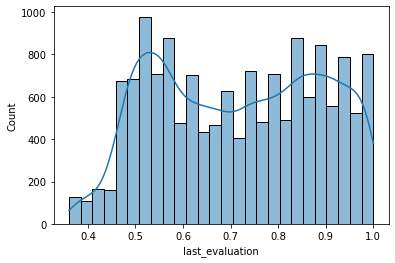

In [125]:
sns.histplot(data = df, x = 'last_evaluation', kde= True);

Satisfaction level has dropped since the last evaluation.

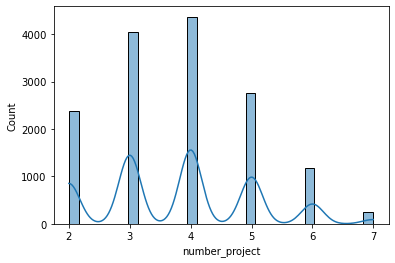

In [126]:
sns.histplot(data = df, x = 'number_project', kde= True);

Most of the employees work on 2 - 4 projects.

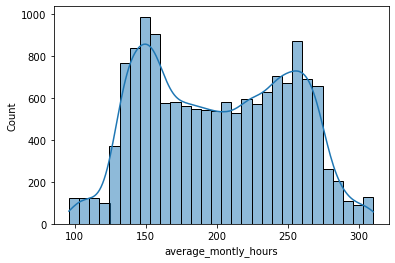

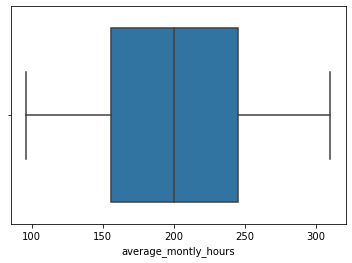

In [123]:
sns.histplot(data = df, x = 'average_montly_hours', kde= True)
plt.show()
sns.boxplot(data = df, x = 'average_montly_hours')
plt.show()

The median number of working hours are 200, there are set of employees (25%) who either underwork (<150 hrs) or overwork (>250).

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

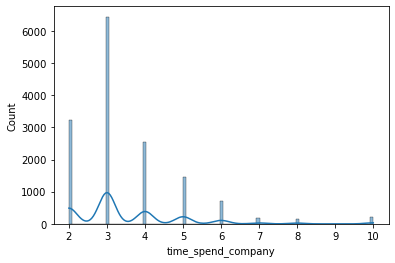

In [17]:
sns.histplot(data = df, x = 'time_spend_company', kde= True);

Most of the employees have been with the company for 2 - 4 years.

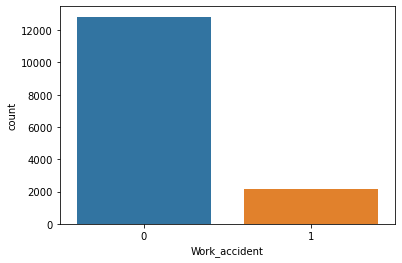

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64

In [129]:
sns.countplot(data = df, x = 'Work_accident');
plt.show()
df['Work_accident'].value_counts(normalize = True)

Around 14% of the employees reported work accidents.

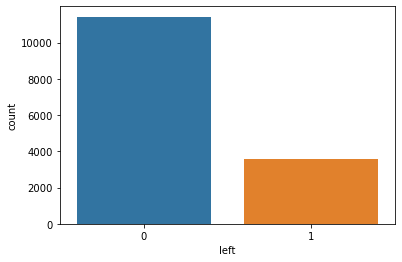

0    0.761917
1    0.238083
Name: left, dtype: float64

In [131]:
sns.countplot(data = df, x = 'left');
plt.show()
df['left'].value_counts(normalize = True)

Around 23% of the employees left the company.

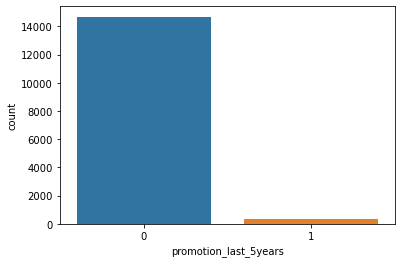

In [151]:
sns.countplot(data = df, x = 'promotion_last_5years');
plt.show()

In [150]:
# calculating attriiton rate w.r.t promotions
df.groupby(['promotion_last_5years'])['left'].sum()/df.groupby(['promotion_last_5years'])['promotion_last_5years'].count()

promotion_last_5years
0    0.241962
1    0.059561
dtype: float64

Employees with promotion in the past 5 years had an attrition rate of 5% compared to 24% attrition rate of employees with no promotion.

In [39]:
# comparing the difference between churned vs current employees
df.groupby(['left']).mean()*100

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,66.680959,71.547340,378.666433,19906.020301,338.003150,17.500875,2.625131
1,44.009801,71.811257,385.550266,20741.921031,387.650518,4.732568,0.532064


Based on this comparison -  satisfaction_level, average_montly_hours, time_spend_company show a big difference in the two sets of employees. These variables will be added to our prediction model.

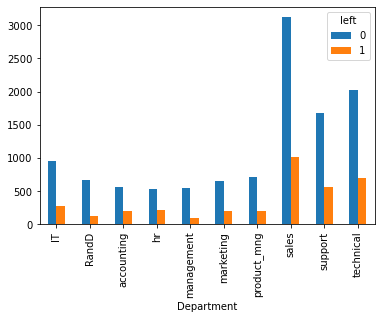

In [159]:
# checking categorical variables for churned vs current employees
pd.crosstab(df.Department,df.left).plot(kind='bar');

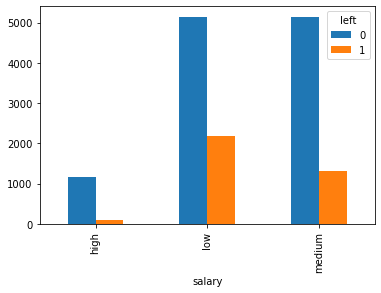

salary
high      0.066289
low       0.296884
medium    0.204313
dtype: float64

In [162]:
pd.crosstab(df.salary,df.left).plot(kind='bar');
plt.show()
sns.
# calculating attriiton rate w.r.t salary
df.groupby(['salary'])['left'].sum()/df.groupby(['salary'])['salary'].count()

Employees with low salaries have a 29% attrition rate, salary impacts attrition so this will be included in our model.
We cannot add categorical variables to our model, we need to create dummies for salary variable.

In [112]:
# Using one hot encoding technique to convert salary into numerical variable
salary_dummies = pd.get_dummies(df.salary,prefix ="salary")
df_with_dummies = pd.concat([df, salary_dummies],axis = 1)
df_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [113]:
# Setting up training and testing model. We are using 10% data for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_with_dummies[['satisfaction_level','time_spend_company','average_montly_hours','salary_high','salary_low','salary_medium']],df.left, test_size =0.1)

In [115]:
# Importing libraries
from sklearn.linear_model import LogisticRegression

In [116]:
# Making instance of the model
model = LogisticRegression()

In [117]:
# Fitting training data to model
model.fit(x_train, y_train)

LogisticRegression()

In [118]:
# Passing test group to predict attrition
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
# Checking accuracy of the model
model.score(x_test, y_test)*100

76.06666666666668

This model can predict employee attrition with 76% accuracy.

#### Insights:
Promotions, Salaries and Hours worked play a great role in determining Employee satisfaction and attrition.

#### Recommendation:
In order to reduce Employee attrition,<br>
    1. Promotions cycle should be more frequent <br>
    2. Salaries should be adjusted for the well performing employees handling more projects than average <br>
    3. Refined distribution of workload to maintain healthy work life balance